## Measuring photometry with rectangular apertures resembling the NIRSpec slits

**piXedfit** provides a new capability to measure a photometry within rectangular aperture with a particular orientation. This can be applied to measure total fluxes within the NIRSpec slit apertures, which can then be compared to the NIRSpec spectrum.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

# Setup inputs

In [2]:
# Set of filters
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w', 'hst_acs_f775w', 
           'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)

# directory of the images
dir_images = '../../images/'

# input science images
sci_img = {}
sci_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_sci.fits.gz'
sci_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_sci.fits.gz'
sci_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_sci.fits.gz'
sci_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_sci.fits.gz'
sci_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_sci.fits.gz'
sci_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_sci.fits.gz'
sci_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_sci.fits.gz'
sci_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz'
sci_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz'

# input weight images
wht_img = {}
wht_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_wht.fits.gz'
wht_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_wht.fits.gz'
wht_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_wht.fits.gz'
wht_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_wht.fits.gz'
wht_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_wht.fits.gz'
wht_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_wht.fits.gz'
wht_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_wht.fits.gz'
wht_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz'
wht_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'

# input variance images
var_img = {}
for bb in range(nbands):
    var_img[filters[bb]] = 'var_'+wht_img[filters[bb]]
    
# Convolution kernels to be used for PSF matching
dir_kernel = '../../PSFs_kernels/'
kernels = {}
kernels['hst_acs_f435w'] = dir_kernel+'kernel_HST_F435W_to_JWST_F480M.fits'
kernels['hst_acs_f475w'] = dir_kernel+'kernel_HST_F475W_to_JWST_F480M.fits'
kernels['hst_acs_f555w'] = dir_kernel+'kernel_HST_F555W_to_JWST_F480M.fits'
kernels['hst_acs_f606w'] = dir_kernel+'kernel_HST_F606W_to_JWST_F480M.fits'
kernels['hst_acs_f625w'] = dir_kernel+'kernel_HST_F625W_to_JWST_F480M.fits'
kernels['hst_acs_f775w'] = dir_kernel+'kernel_HST_F775W_to_JWST_F480M.fits'
kernels['hst_acs_f814w'] = dir_kernel+'kernel_HST_F814W_to_JWST_F480M.fits'
kernels['hst_acs_f850lp'] = dir_kernel+'kernel_HST_F850LP_to_JWST_F480M.fits'
kernels['jwst_nircam_f115w'] = dir_kernel+'kernel_JWST_F115W_to_JWST_F480M.fits'
kernels['jwst_nircam_f150w'] = dir_kernel+'kernel_JWST_F150W_to_JWST_F480M.fits'
kernels['jwst_nircam_f200w'] = dir_kernel+'kernel_JWST_F200W_to_JWST_F480M.fits'
kernels['jwst_nircam_f277w'] = dir_kernel+'kernel_JWST_F277W_to_JWST_F480M.fits'
kernels['jwst_nircam_f356w'] = dir_kernel+'kernel_JWST_F356W_to_JWST_F480M.fits'
kernels['jwst_nircam_f444w'] = dir_kernel+'kernel_JWST_F444W_to_JWST_F480M.fits'
kernels['jwst_nircam_f480m'] = None

# The unit, scale, and pixel size
# Pixel size can be obtained using calc_pixsize function
from piXedfit.piXedfit_images import calc_pixsize

img_unit = {}
img_scale = {}
img_pixsizes = {}
for bb in range(0,nbands):
    img_unit[filters[bb]] = 'erg/s/cm2/A'
    
    hdu = fits.open(dir_images+sci_img[filters[bb]])
    img_scale[filters[bb]] = float(hdu[0].header['PHOTFLAM'])
    hdu.close()
    
    img_pixsizes[filters[bb]] = calc_pixsize(dir_images+sci_img[filters[bb]])

# The coordinate and redshift of MACS0647-JD2. 
# In general, redshift information is optional here. 
# We use photometric redshift estimate from EAZY code.
oriID = 3349
gal_ra = 101.971326
gal_dec = 70.239716
gal_z = 10.17

# Size of the stamp images to be produced from the image processing
stamp_size = [111,111]

## Initialize image processing 

Initializing `images_processing` class without running the actual image processing because it has been performed before (see `image_processing_stamp_images_JD1.ipynb`). 

In [3]:
from piXedfit.piXedfit_images import images_processing

# We don't do PSF matching in this anlysis, so we set flag_psfmatch=1
# We will also apply oversampling by reprojecting the images to match the spatial sampling of F150W (0.02"/pixel) and without PSF matching

# Because we have performed image processing in image_processing_stamp_images_JD1.ipynb, so we can set run_image_processing=False
flag_psfmatch = 1
flag_reproject = 0
idfil_align = 9
img_process = images_processing(filters, sci_img, var_img, gal_ra, gal_dec, dir_images=dir_images, img_unit=img_unit, img_scale=img_scale, 
                                run_image_processing=False, flag_psfmatch=flag_psfmatch, flag_reproject=flag_reproject, img_pixsizes=img_pixsizes, 
                                gal_z=gal_z, stamp_size=stamp_size, idfil_align=9)

## Provide the names of the stamp images produced from the image processing

In [4]:
output_stamps = {'name_img_hst_acs_f435w': 'stamp_crop_macs0647-grizli-v6.0-f435w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f435w': 'stamp_crop_var_macs0647-grizli-v6.0-f435w_drc_wht.fits.gz', 
                 'idfil_align': 9, 'idfil_psfmatch': 0, 'name_img_hst_acs_f475w': 'stamp_crop_macs0647-grizli-v6.0-f475w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f475w': 'stamp_crop_var_macs0647-grizli-v6.0-f475w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f555w': 'stamp_crop_macs0647-grizli-v6.0-f555w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f555w': 'stamp_crop_var_macs0647-grizli-v6.0-f555w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f606w': 'stamp_crop_macs0647-grizli-v6.0-f606w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f606w': 'stamp_crop_var_macs0647-grizli-v6.0-f606w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f625w': 'stamp_crop_macs0647-grizli-v6.0-f625w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f625w': 'stamp_crop_var_macs0647-grizli-v6.0-f625w_drc_wht.fits.gz',
                 'name_img_hst_acs_f775w': 'stamp_crop_macs0647-grizli-v6.0-f775w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f775w': 'stamp_crop_var_macs0647-grizli-v6.0-f775w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f814w': 'stamp_crop_macs0647-grizli-v6.0-f814w_drc_sci.fits.gz', 
                 'name_var_hst_acs_f814w': 'stamp_crop_var_macs0647-grizli-v6.0-f814w_drc_wht.fits.gz', 
                 'name_img_hst_acs_f850lp': 'stamp_crop_macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz', 
                 'name_var_hst_acs_f850lp': 'stamp_crop_var_macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f115w': 'stamp_crop_macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz',
                 'name_var_jwst_nircam_f115w': 'stamp_crop_var_macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f150w': 'stamp_crop_macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f150w': 'stamp_crop_var_macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f200w': 'stamp_crop_macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f200w': 'stamp_crop_var_macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f277w': 'stamp_crop_macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f277w': 'stamp_crop_var_macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f356w': 'stamp_crop_macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f356w': 'stamp_crop_var_macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f444w': 'stamp_crop_macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f444w': 'stamp_crop_var_macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz', 
                 'name_img_jwst_nircam_f480m': 'stamp_crop_macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz', 
                 'name_var_jwst_nircam_f480m': 'stamp_crop_var_macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'}

## Plot the stamp images

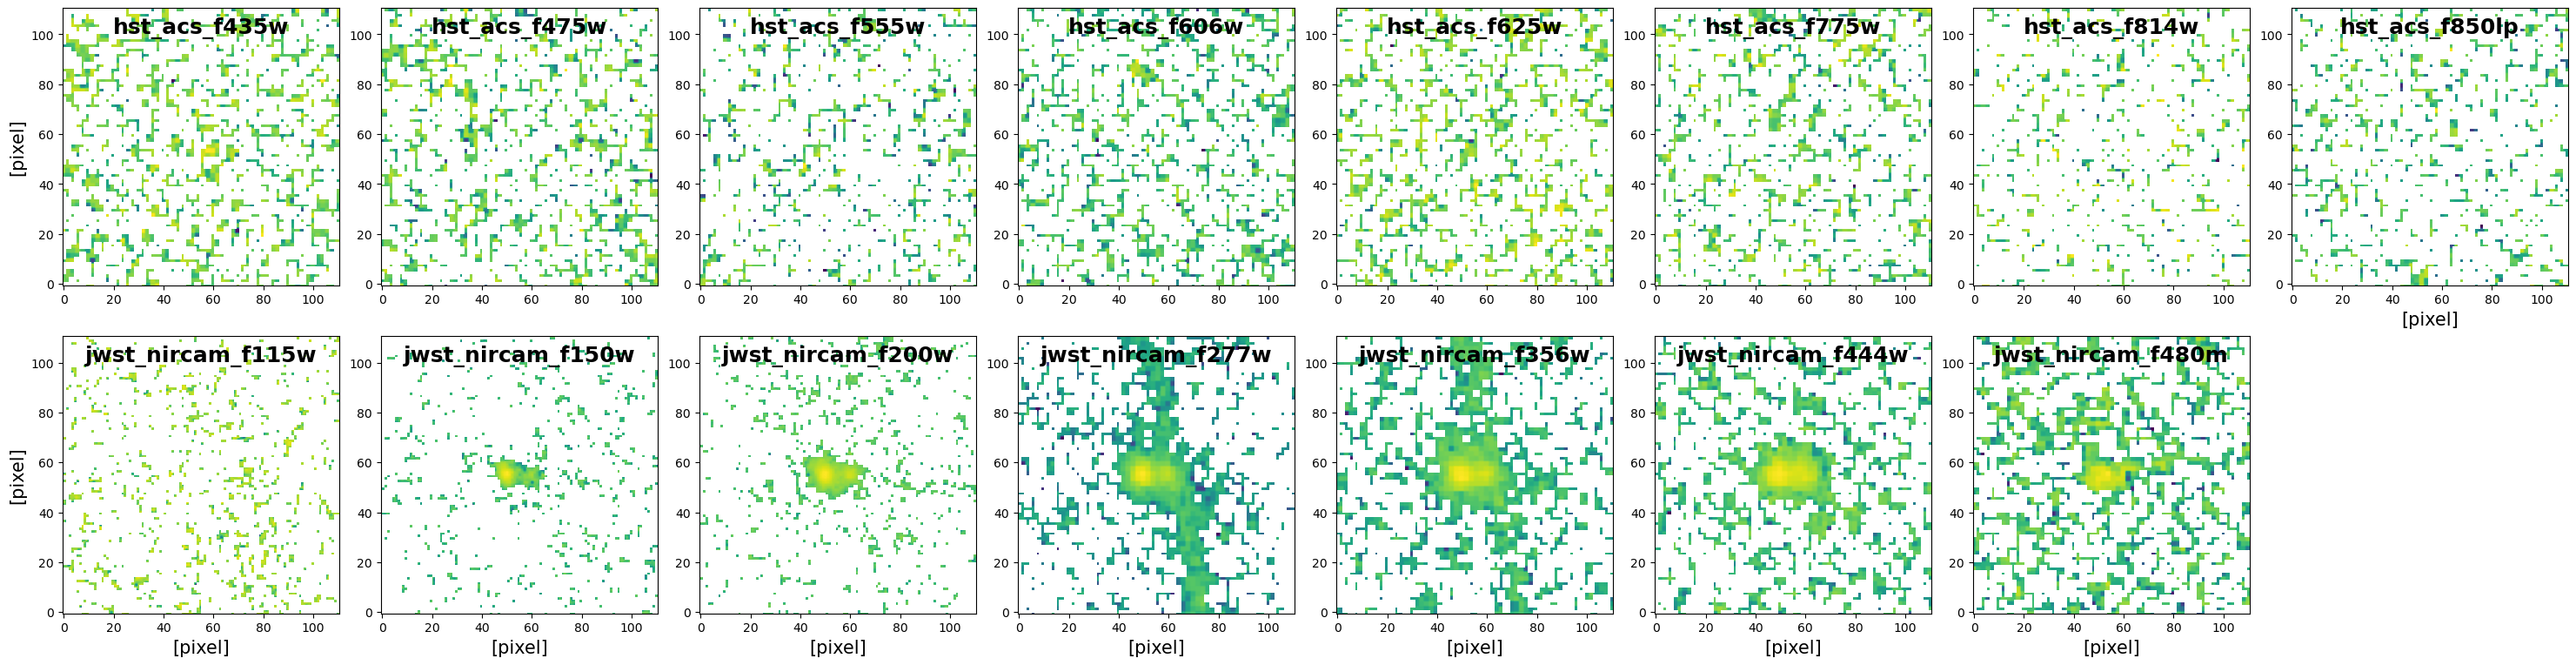

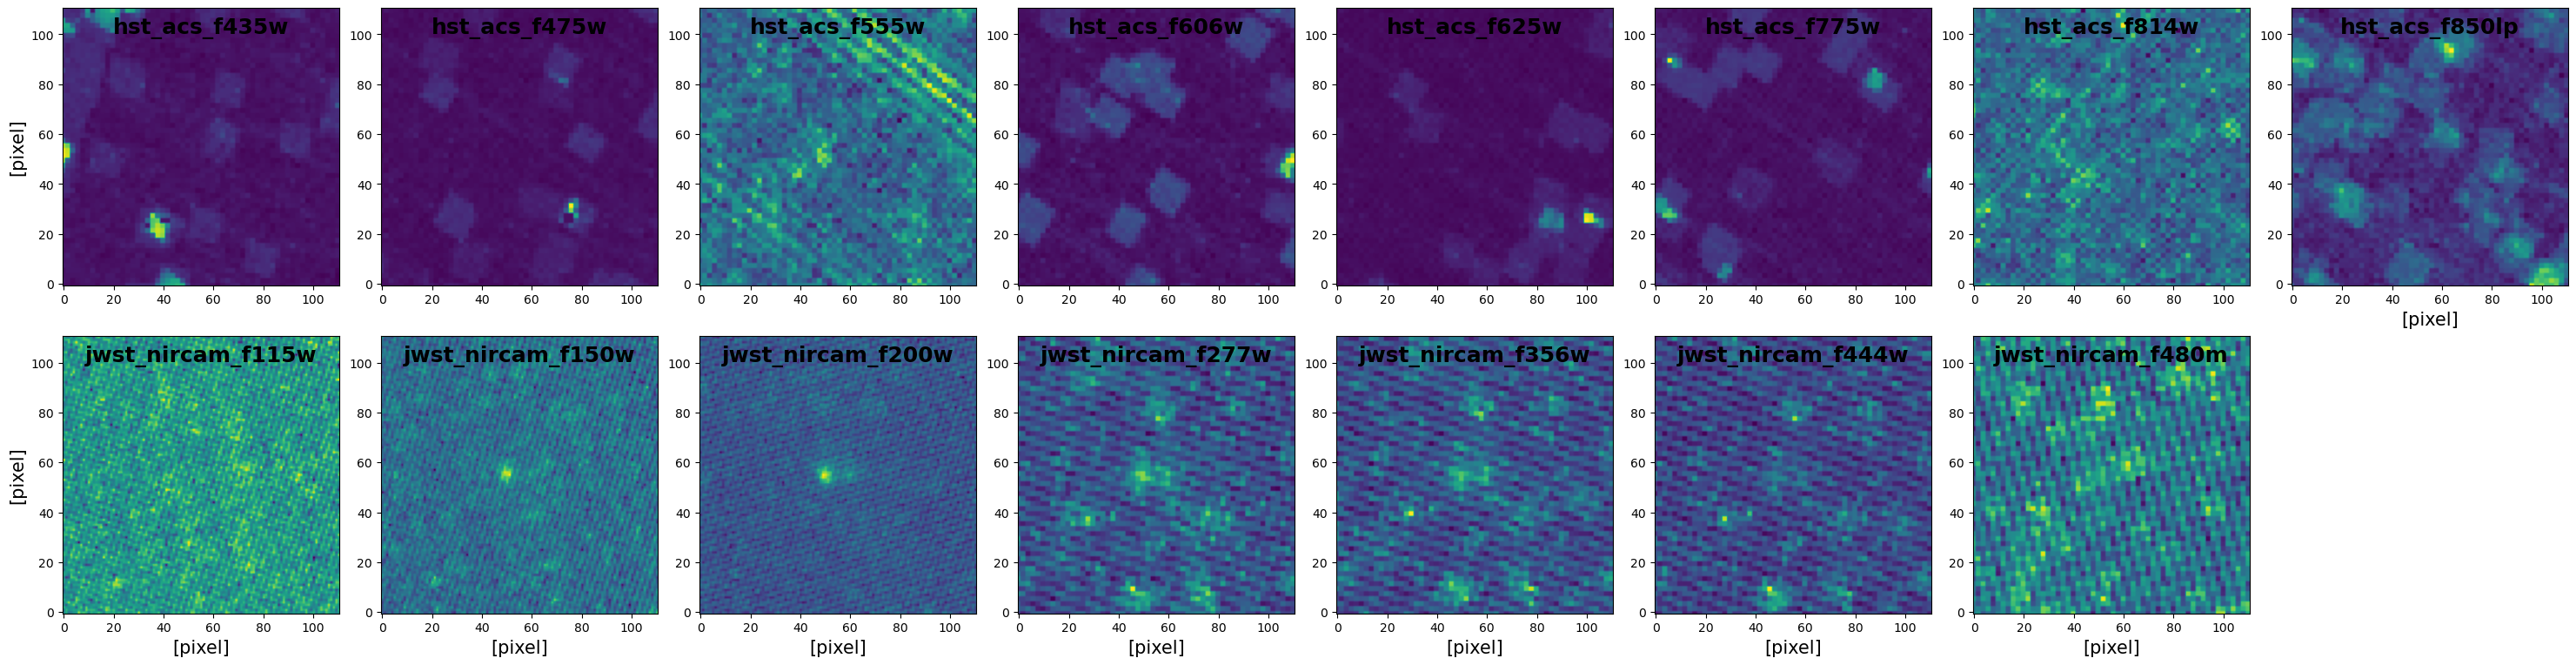

In [5]:
%matplotlib inline
img_process.plot_image_stamps(output_stamps=output_stamps, ncols=8)

## JD2 Observation 21

### Plot the aperture on the stamp images

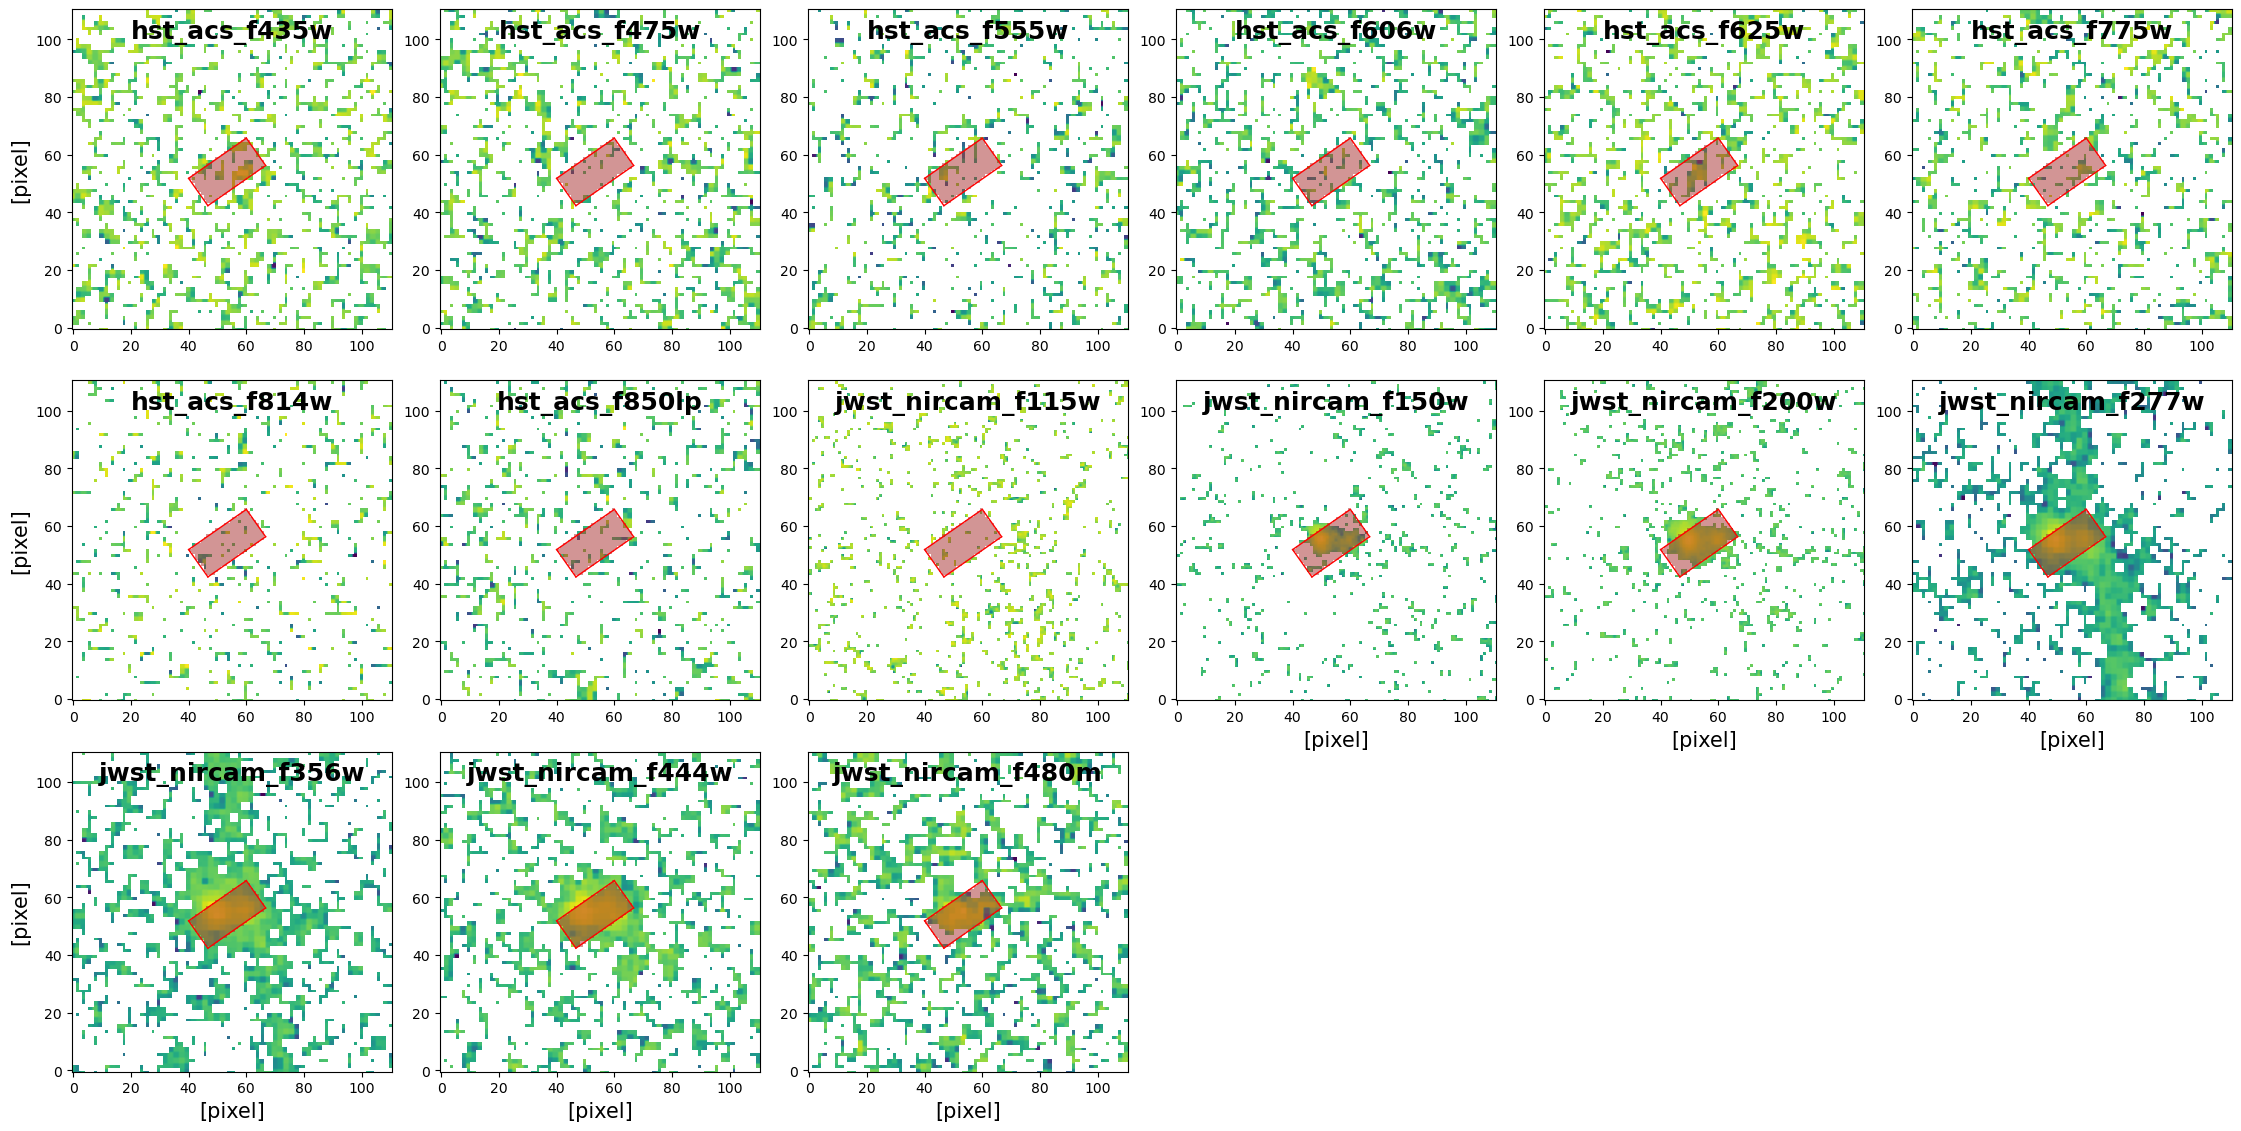

In [6]:
# coordinate of the NIRSpec slit
# Obs 21 uses single slit
slits_ra = [101.97114141, 101.97125135, 101.97158020, 101.97147026] 
slits_dec = [70.23972284, 70.23977548, 70.23969798, 70.23964534]

ra = slits_ra
dec = slits_dec
slit_region1 = img_process.rectangular_regions(output_stamps=output_stamps, x=None, y=None, ra=ra, dec=dec, 
                                                make_plot=True, ncols=6, savefig=True, name_plot=None)

### Get estimate of the extinction due to the Galactic foreground dust

In [7]:
from piXedfit.piXedfit_images import EBV_foreground_dust

Gal_EBV = EBV_foreground_dust(gal_ra, gal_dec)
print ('Gal_EBV = %lf' % Gal_EBV)

Gal_EBV = 0.092997


### Calculate the maps of fluxes and flux uncertainties in multiple bands: producing photometric data cube

In [8]:
flux_maps_fits = "fluxmap_macs0647jd2_slitphoto_obs21.fits"
img_process.flux_map(slit_region1, output_stamps=output_stamps, Gal_EBV=Gal_EBV, name_out_fits=flux_maps_fits)

'fluxmap_macs0647jd2_slitphoto_obs21.fits'

### Plot the maps of multiband fluxes

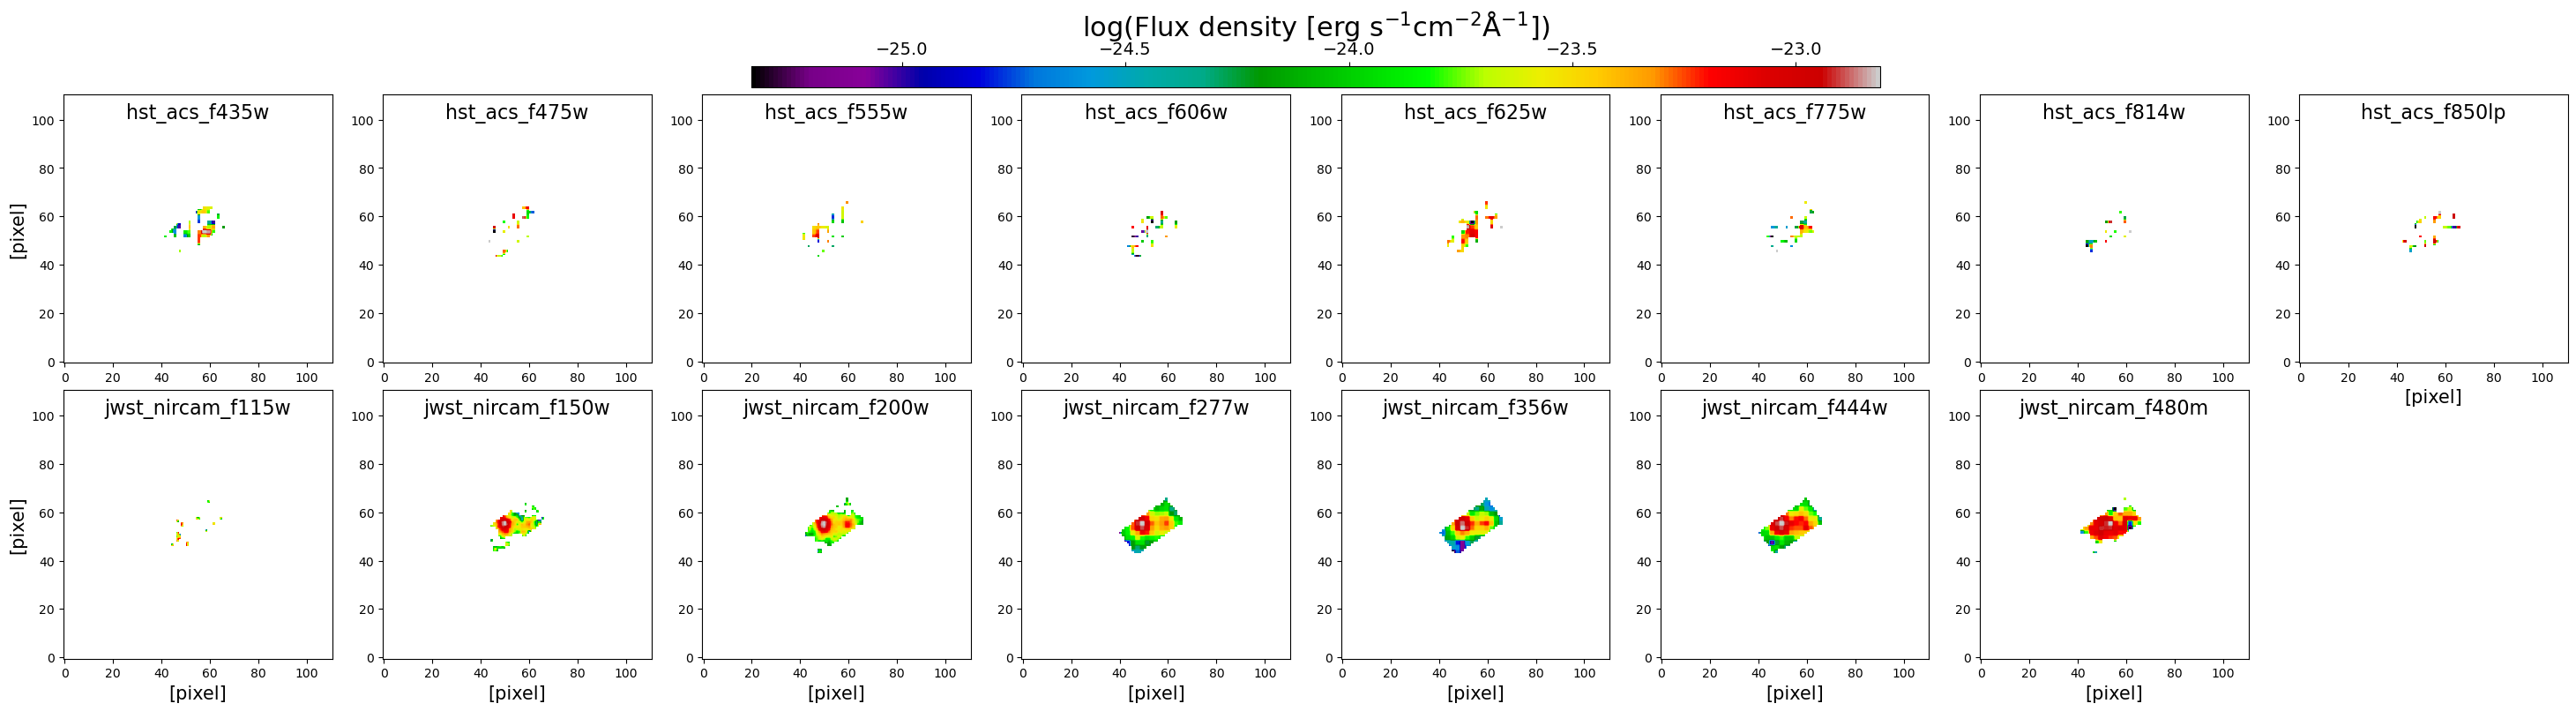

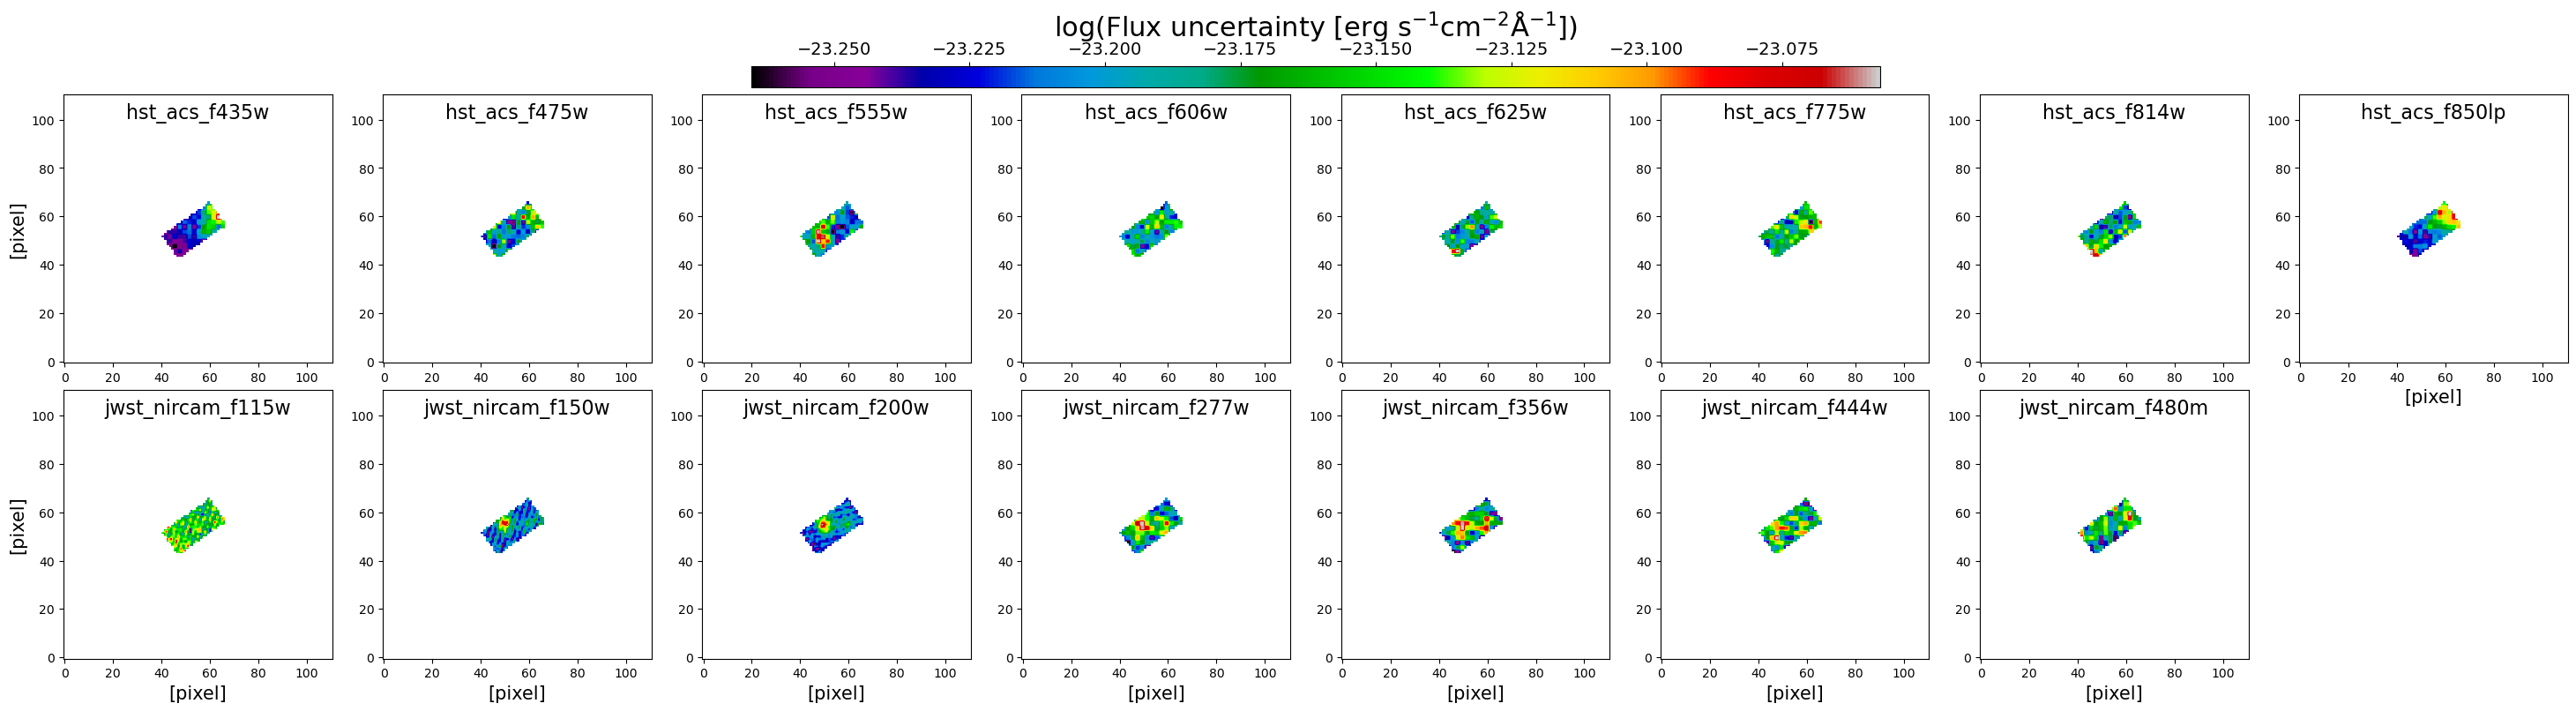

In [9]:
from piXedfit.piXedfit_images import plot_maps_fluxes

plot_maps_fluxes(flux_maps_fits, ncols=8)

## Get the total fluxes

In [10]:
from piXedfit.piXedfit_images import get_total_SED

JD2_obs21_tot_SED_flux, JD2_obs21_tot_SED_flux_err, photo_wave = get_total_SED(flux_maps_fits)

## Convert the flux unit to $\mu$Jy

In [11]:
from piXedfit.piXedfit_images import convert_flux_unit

JD2_obs21_tot_SED_flux_uJy = convert_flux_unit(photo_wave, JD2_obs21_tot_SED_flux, init_unit='erg/s/cm2/A', final_unit='uJy')
JD2_obs21_tot_SED_flux_err_uJy = convert_flux_unit(photo_wave, JD2_obs21_tot_SED_flux_err, init_unit='erg/s/cm2/A', final_unit='uJy')

## Plot the SED

<ErrorbarContainer object of 3 artists>

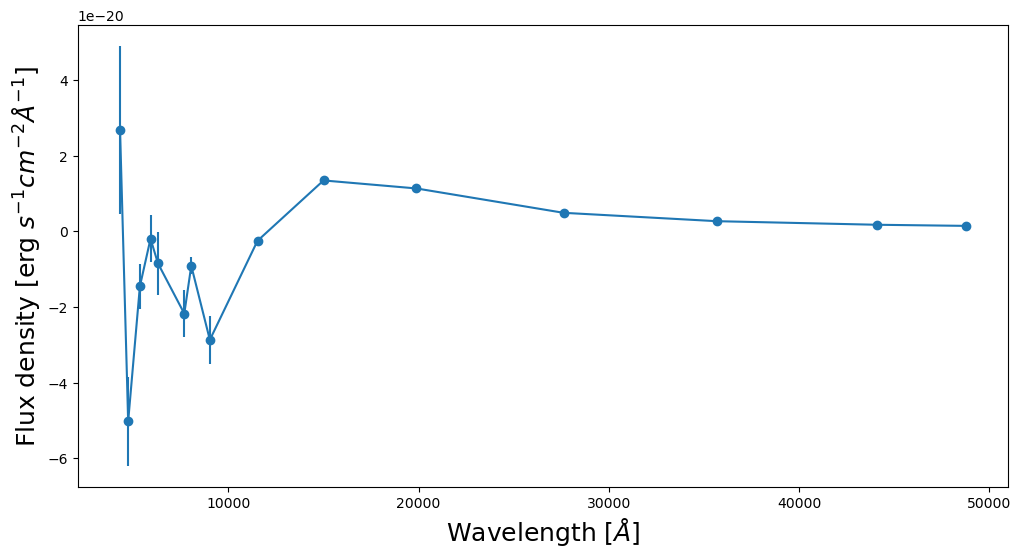

In [12]:
fig1 = plt.figure(figsize=(12,6))
f1 = plt.subplot()
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux density [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

plt.errorbar(photo_wave, JD2_obs21_tot_SED_flux, yerr=JD2_obs21_tot_SED_flux_err, fmt='-o')

<ErrorbarContainer object of 3 artists>

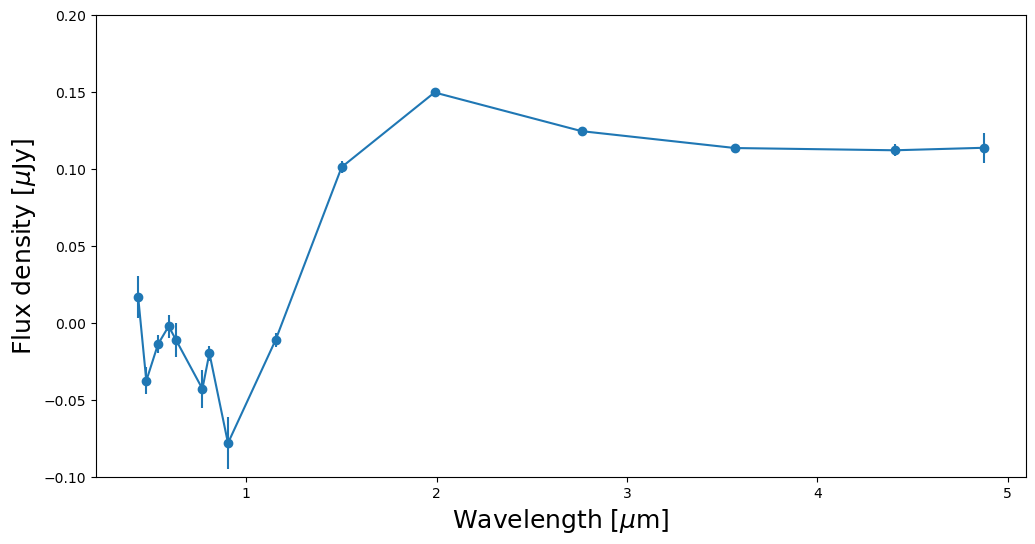

In [13]:
fig1 = plt.figure(figsize=(12,6))
f1 = plt.subplot()
plt.ylim(-0.1,0.2)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux density [$\mu$Jy]", fontsize=18)

plt.errorbar(photo_wave/1e+4, JD2_obs21_tot_SED_flux_uJy, yerr=JD2_obs21_tot_SED_flux_err_uJy, fmt='-o')

## JD2 Observation 23

### Plot the NIRSpec slits apertures on the stamp images

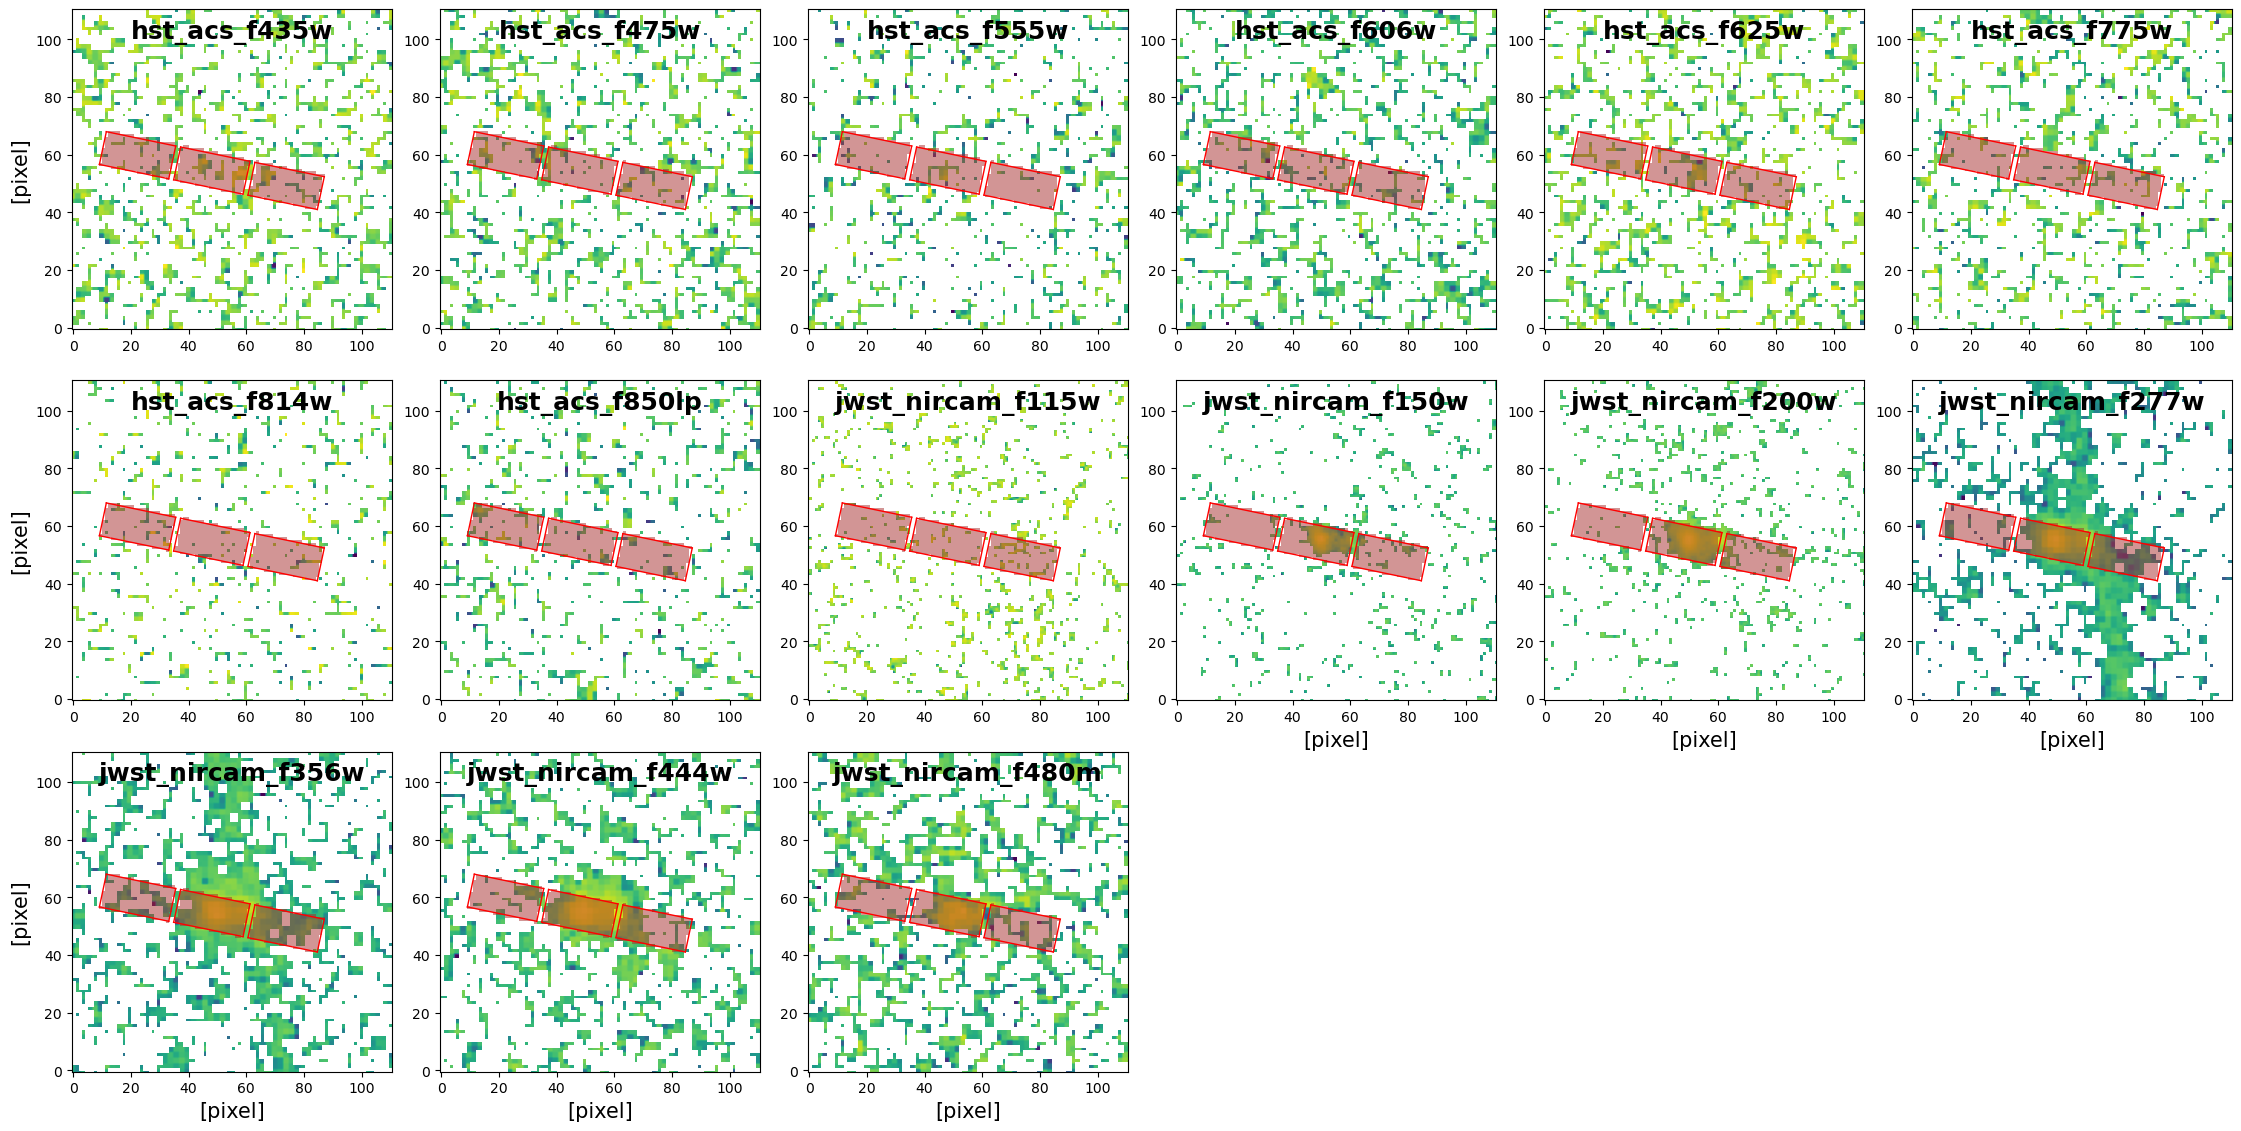

In [14]:
# coordinate of the NIRSpec slit
# Obs 23 uses three slitlets
slits_ra = [[101.97084653, 101.97080699, 101.97120248, 101.97124202], 
            [101.97126998, 101.97123044, 101.9716259, 101.97166543], 
            [101.97169339, 101.97165386, 101.97204929, 101.97208882]]

slits_dec = [[70.23963808, 70.23970124, 70.23972882, 70.23966566], 
             [70.23966761, 70.23973077, 70.23975834, 70.23969518], 
             [70.23969713, 70.23976029, 70.23978787, 70.2397247]]

ra = slits_ra
dec = slits_dec
slit_region2 = img_process.rectangular_regions(output_stamps=output_stamps, x=None, y=None, ra=ra, dec=dec, 
                                                make_plot=True, ncols=6, savefig=True, name_plot=None)

### Central slit only

We will measure photometry with the central slit only.

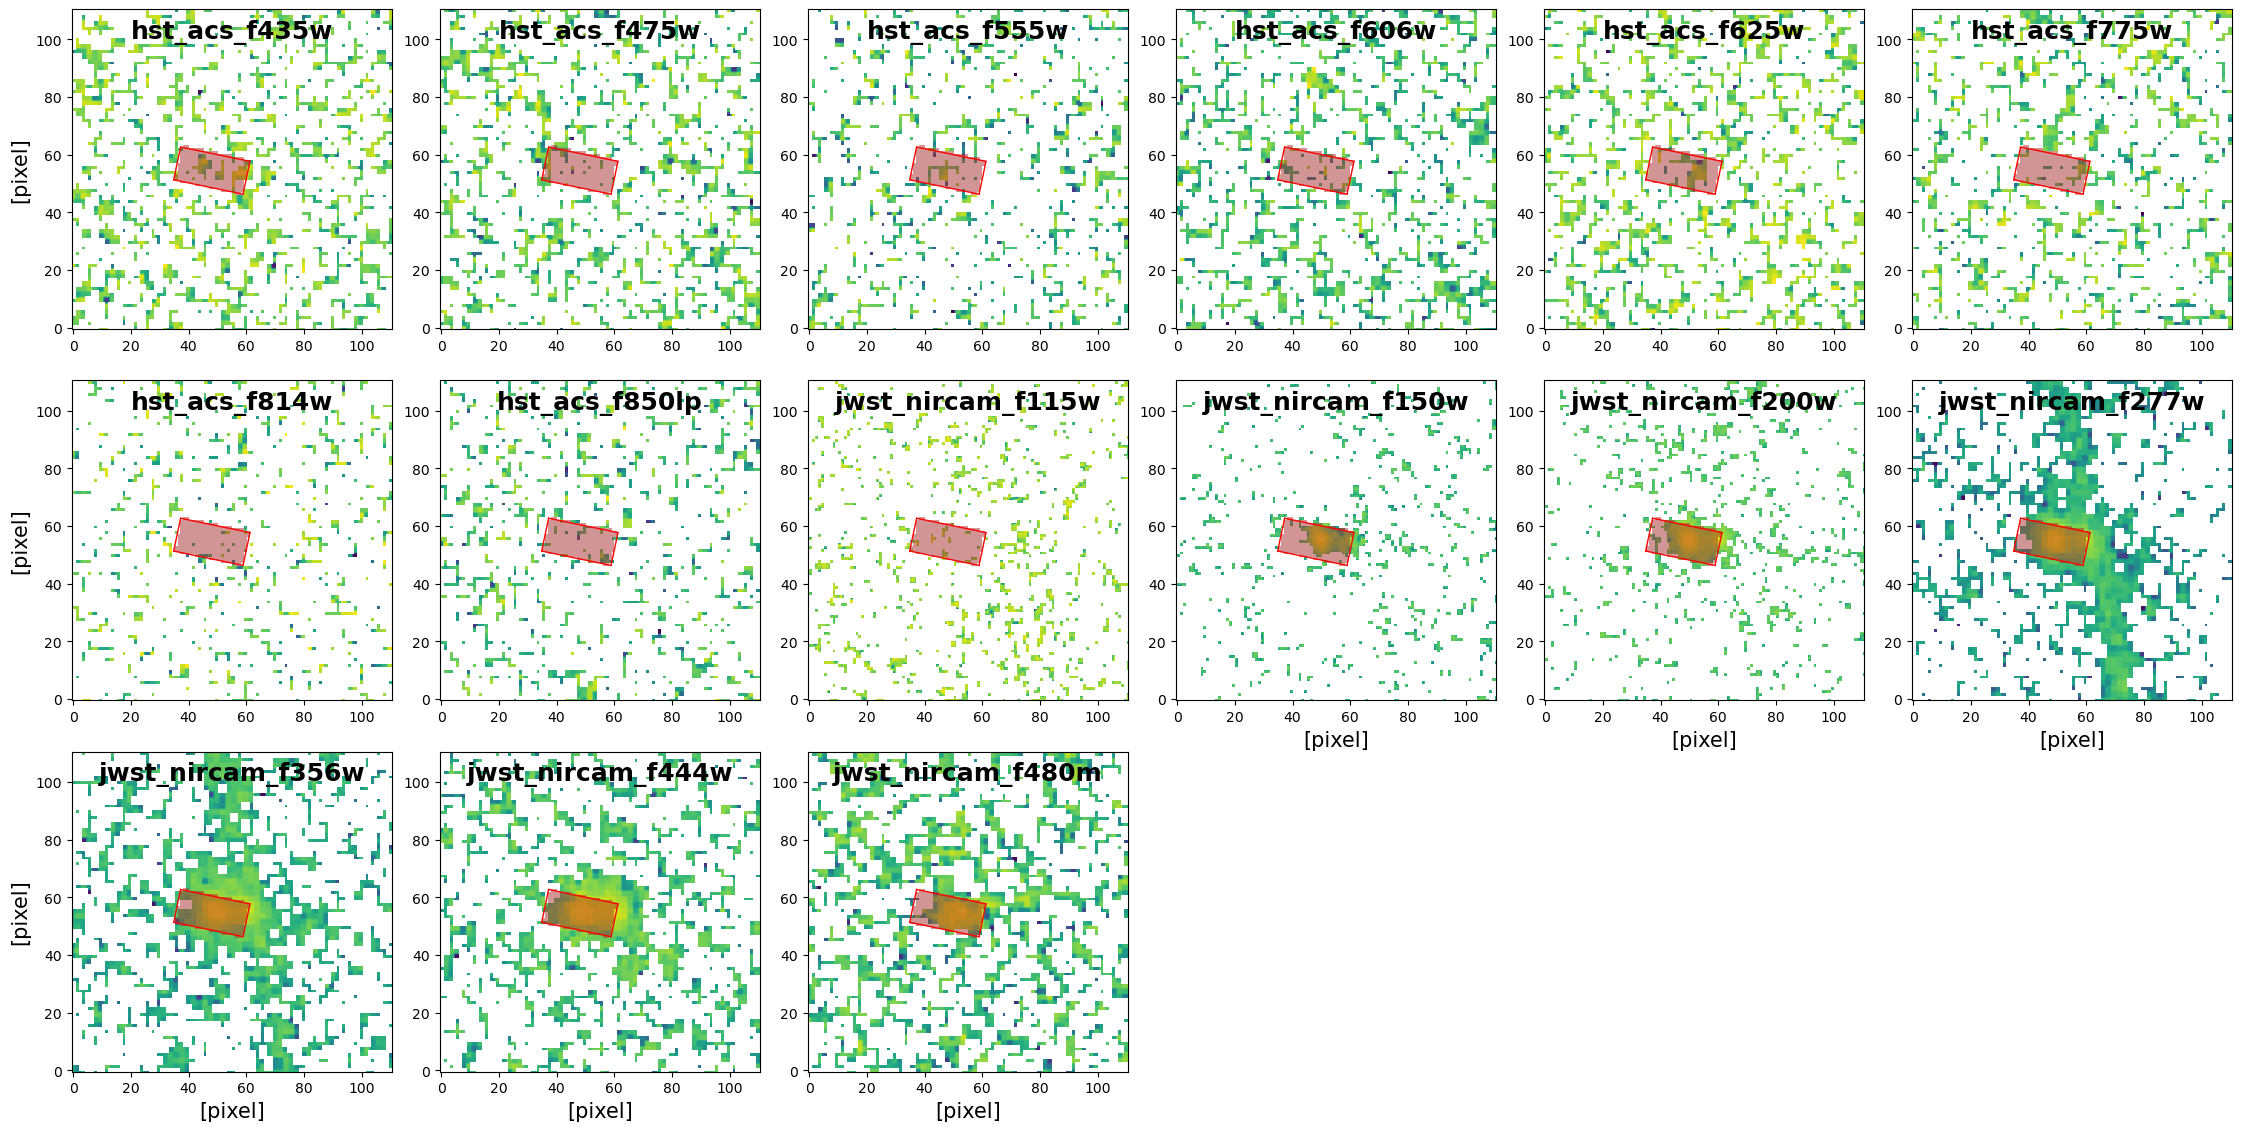

In [15]:
# coordinate of the NIRSpec slit: the central one
slits_ra = [101.97126998, 101.97123044, 101.9716259, 101.97166543]
slits_dec = [70.23966761, 70.23973077, 70.23975834, 70.23969518]

ra = slits_ra
dec = slits_dec
slit_region3 = img_process.rectangular_regions(output_stamps=output_stamps, x=None, y=None, ra=ra, dec=dec, 
                                                make_plot=True, ncols=6, savefig=True, name_plot=None)

### Calculate the maps of fluxes and flux uncertainties

In [16]:
flux_maps_fits = "fluxmap_macs0647jd2_slitphoto_obs23.fits"
img_process.flux_map(slit_region3, output_stamps=output_stamps, Gal_EBV=Gal_EBV, name_out_fits=flux_maps_fits)

'fluxmap_macs0647jd2_slitphoto_obs23.fits'

### Plot the maps of multiband fluxes and flux uncertainties

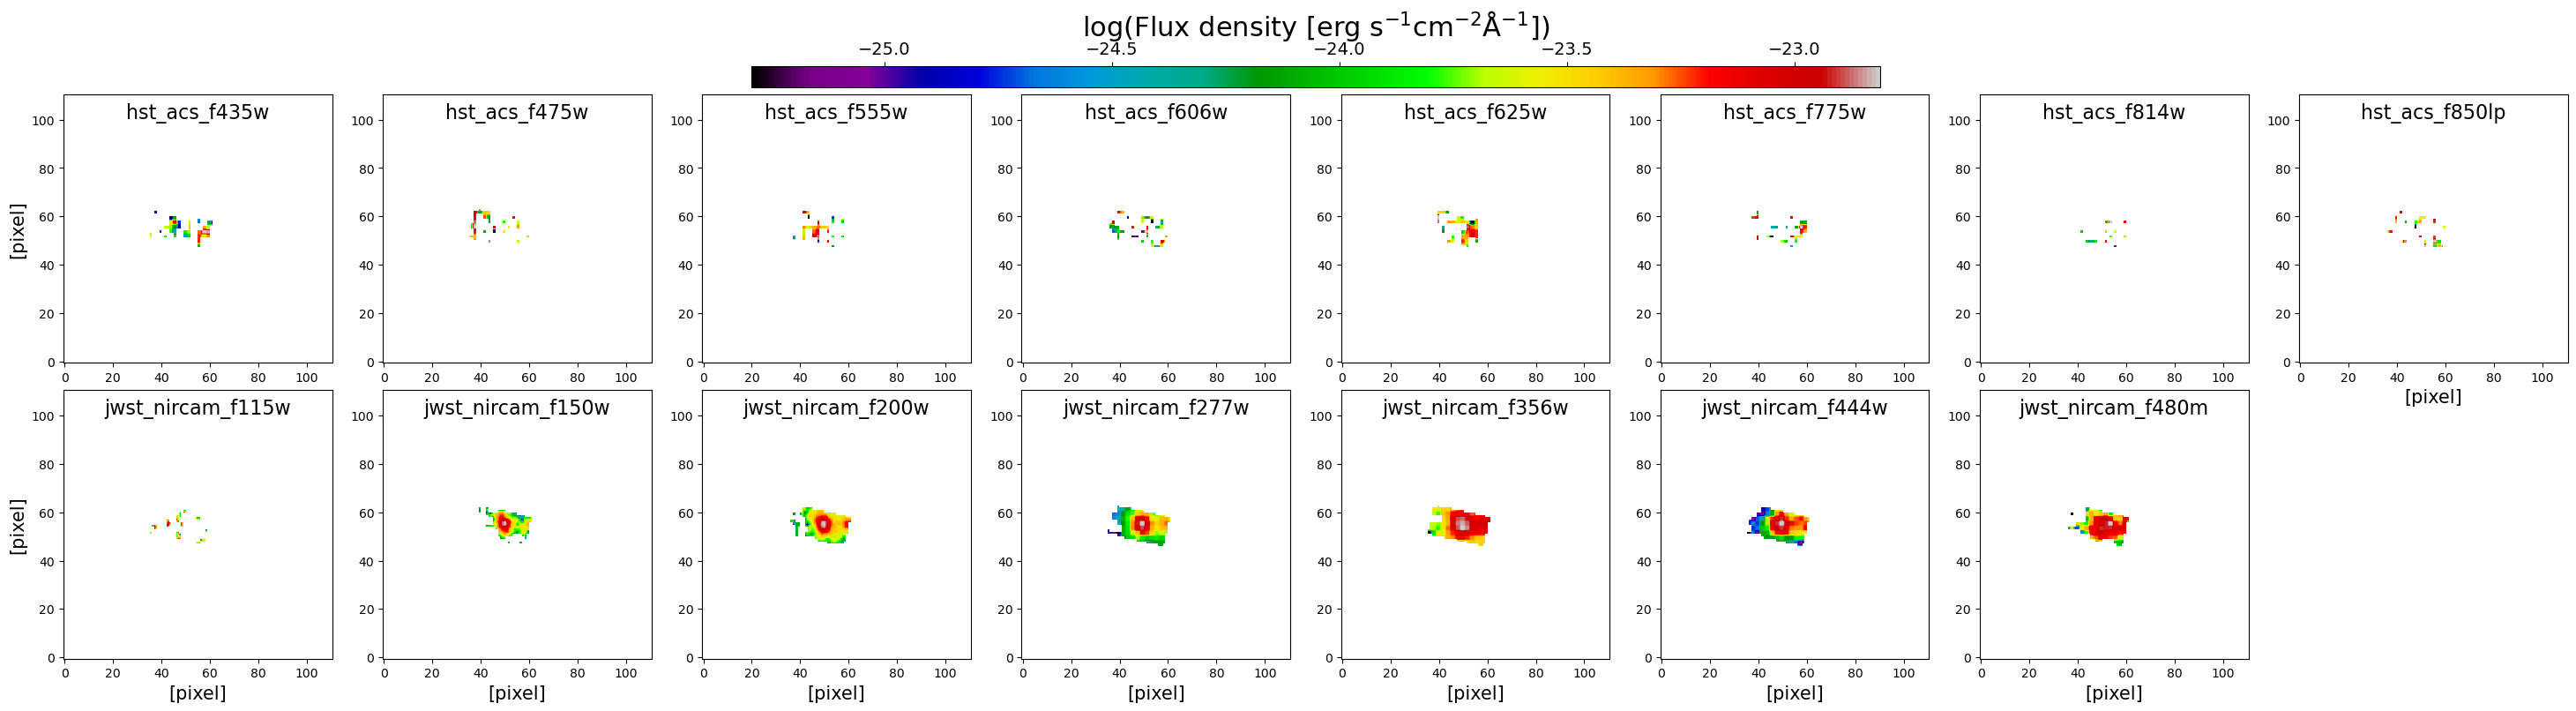

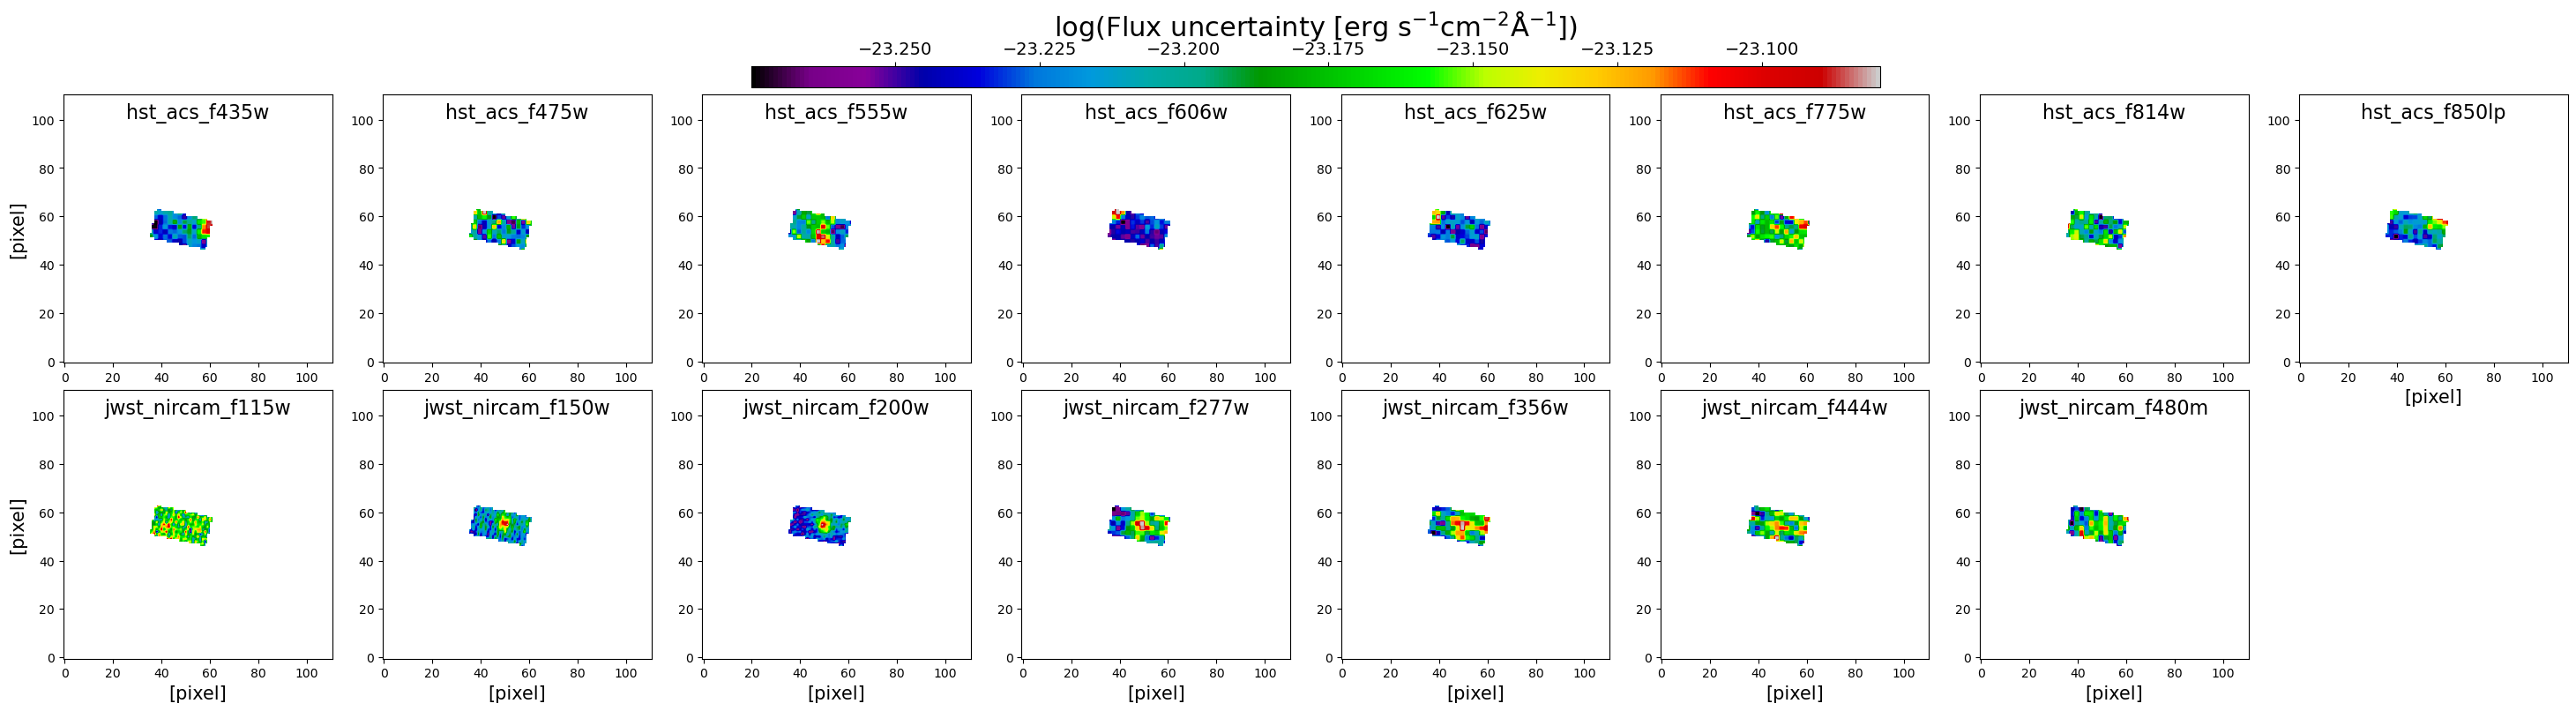

In [17]:
from piXedfit.piXedfit_images import plot_maps_fluxes

plot_maps_fluxes(flux_maps_fits, ncols=8)

### Get the total fluxes

In [18]:
from piXedfit.piXedfit_images import get_total_SED

JD2_obs23_tot_SED_flux, JD2_obs23_tot_SED_flux_err, photo_wave = get_total_SED(flux_maps_fits)

## Convert the flux unit to $\mu$Jy

In [19]:
from piXedfit.piXedfit_images import convert_flux_unit

JD2_obs23_tot_SED_flux_uJy = convert_flux_unit(photo_wave, JD2_obs23_tot_SED_flux, init_unit='erg/s/cm2/A', final_unit='uJy')
JD2_obs23_tot_SED_flux_err_uJy = convert_flux_unit(photo_wave, JD2_obs23_tot_SED_flux_err, init_unit='erg/s/cm2/A', final_unit='uJy')

## Plot the SED

<ErrorbarContainer object of 3 artists>

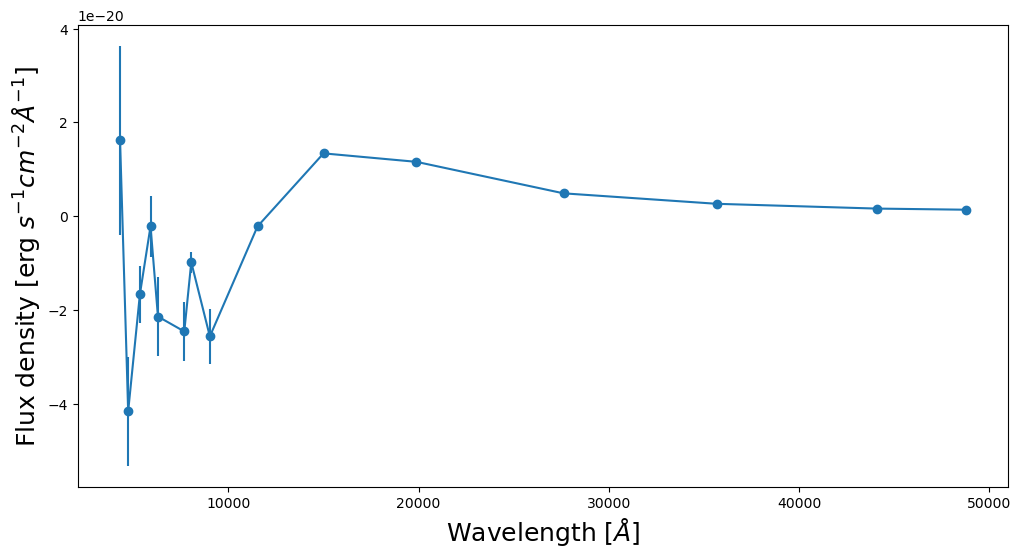

In [20]:
fig1 = plt.figure(figsize=(12,6))
f1 = plt.subplot()
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux density [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

plt.errorbar(photo_wave, JD2_obs23_tot_SED_flux, yerr=JD2_obs23_tot_SED_flux_err, fmt='-o')

<ErrorbarContainer object of 3 artists>

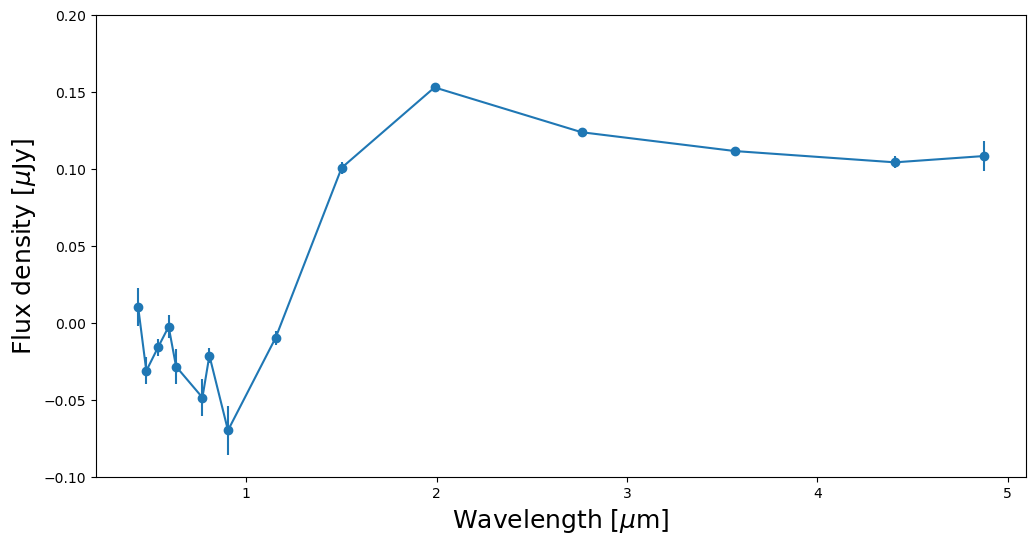

In [21]:
fig1 = plt.figure(figsize=(12,6))
f1 = plt.subplot()
plt.ylim(-0.1,0.2)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux density [$\mu$Jy]", fontsize=18)

plt.errorbar(photo_wave/1e+4, JD2_obs23_tot_SED_flux_uJy, yerr=JD2_obs23_tot_SED_flux_err_uJy, fmt='-o')